<a href="https://colab.research.google.com/github/tubagus86/IYKRA-Fellowship/blob/master/Practice_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd # untuk membaca dataset
import numpy as np # untuk perhitungan statistik
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi

In [40]:
df_insurance1 = pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', None)

# **1. Bagaimana bentuk datanya**

In [41]:
# the shape of data
df_insurance1.shape

(1338, 7)

Dataset berisi 1338 rows dan 7 column

# **2. Bagaimana tipe datanya?**

In [42]:
# struktur data dan preview
print(df_insurance1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# **3. Apakah terdapat missing values pada data?**


In [43]:
df_insurance1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **4. Five Point summary numerical attributes**

Dari hasil dapat terlihat bahwa sama sekali tidak ada missing values pada data

In [44]:
df_insurance1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **5. Bagaimana distribusi data 'bmi','age' dan charges?**

Text(0.5, 1.0, 'Distribution Plot of Charges')

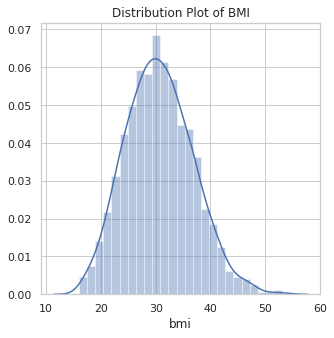

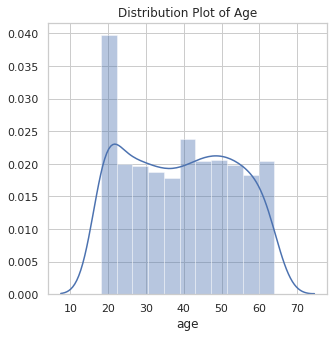

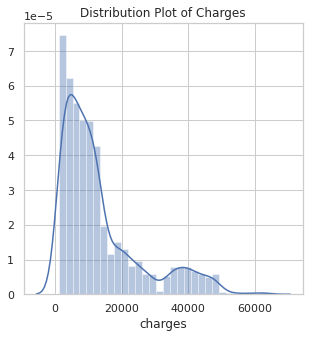

In [45]:
# Distribusi data pada 'bmi'

fig, ax = plt.subplots(figsize=(5,5)) # distribusi data numerik dengan histogram
sns.distplot(df_insurance1['bmi'].dropna(),
            ax=ax).set_title('Distribution Plot of BMI')

fig, ax = plt.subplots(figsize=(5,5)) # distribusi data numerik dengan histogram
sns.distplot(df_insurance1['age'].dropna(),
            ax=ax).set_title('Distribution Plot of Age')

fig, ax = plt.subplots(figsize=(5,5)) # distribusi data numerik dengan histogram
sns.distplot(df_insurance1['charges'].dropna(),
            ax=ax).set_title('Distribution Plot of Charges')

Dari grafik histogram dapat terlihat bahwa untuk 'bmi' datanya terdistribusi normal

# **6. Menghitung Skewness**

In [46]:
df_insurance1.skew(axis=0,skipna=True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# **7. Cek Outlier**

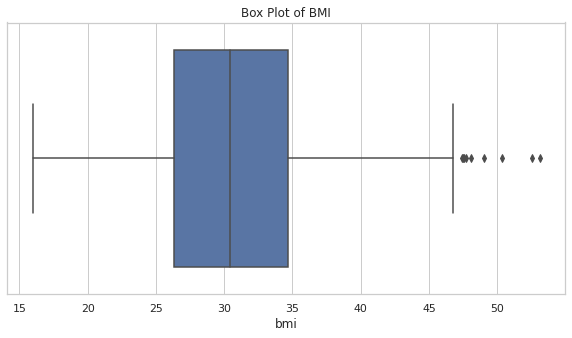

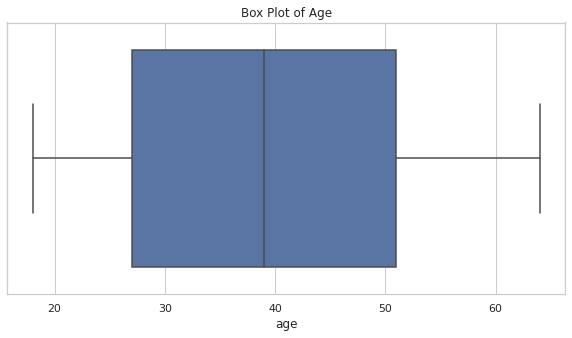

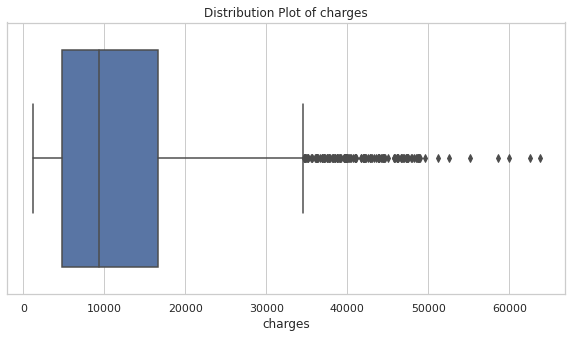

In [47]:
fig,ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x = df_insurance1['bmi']).set_title('Box Plot of BMI')

fig,ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x = df_insurance1['age']).set_title('Box Plot of Age')

fig,ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x = df_insurance1['charges']).set_title('Distribution Plot of charges')

# **8. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)**

In [48]:
df_insurance1.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Jumlah yang tidak merokok lebih banyak dari yang tidak merokok

In [49]:
Ho = "Smoker and No Smoker have same charges"
H1 = "Smoker and No Smoker doesn't have same charges"

In [50]:
from scipy import stats

In [51]:
z, p_value = stats.mannwhitneyu(df_insurance1[df_insurance1.smoker == 'yes'].charges,
                df_insurance1[df_insurance1.smoker == 'no'].charges
                , use_continuity=True, alternative=None)

kita tentukan siginificant level di 95% dengan p-value < alpha (0.05)

In [52]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(H1)
else:
    print(Ho)

Smoker and No Smoker doesn't have same charges
